# KNN

En este _notebook_ vamos a aprender a entrenar un modelo KNN de Scikit Learn. Para esto vamos a volver a trabajar con el _dataset_ de flores _Iris_ y vamos a gráficar la frontera de decisión (_Decision Boundary_) del modelo entrenado. Primero vamos a importar las librerías y los datos.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# Tomamos el largo y ancho del pétalo, respectivamente
X = iris.data[:, [2, 3]]
# Los target son setosa, versicolor y virginica
y = iris.target

Ahora definimos el $K$ para nuestro modelo, luego utilizamos el `KNeighborsClassifier` de Scikit Learn. Finalmente graficamos la frontera de decisión.

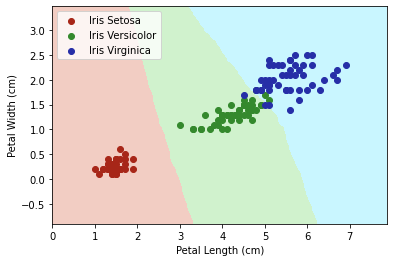

In [52]:
K = 15

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])
cmap_bold = ['#a72618', '#34892d', '#262ea7']

# KNN donde no pesan las distancias
clf = neighbors.KNeighborsClassifier(K, weights='uniform') 
clf.fit(X, y)

# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Ahora exploremos KNN pero considerando pesos por las distancias.

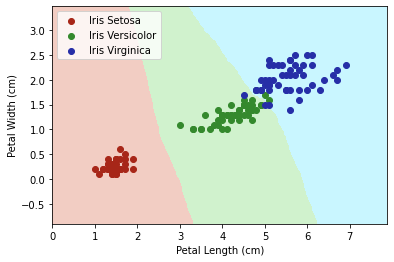

In [51]:
K = 15

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])
cmap_bold = ['#a72618', '#34892d', '#262ea7']

# KNN donde no pesan las distancias
clf = neighbors.KNeighborsClassifier(K, weights='distance') 
clf.fit(X, y)

# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Agregamos los datos del dataset con color bold
plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()